inspired by https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
use conda env dt

In [124]:
import sklearn.datasets as datasets
import pandas as pd
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier

# iris=datasets.load_iris()
# df=pd.DataFrame(iris.data, columns=iris.feature_names)
original_df=pd.read_csv('zoo-animal-classification/zoo.csv', index_col=False)
class_names_df = pd.read_csv('zoo-animal-classification/class.csv', index_col=False)
# df = original_df.copy()



In [125]:
class_only = class_names_df[['Class_Number', 'Class_Type']]
class_only = class_only.rename(columns={'Class_Number': 'class_type', "Class_Type": "class_name"})

In [126]:
class_only

,class_type,class_name
0,1,Mammal
1,2,Bird
2,3,Reptile
3,4,Fish
4,5,Amphibian
5,6,Bug
6,7,Invertebrate


In [127]:
class_only

df = pd.merge(original_df, class_only, on='class_type', how='outer')


In [128]:
y=df['class_name']

del df['animal_name']
del df['class_name']
del df['class_type']

In [129]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0
7,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
8,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
9,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1


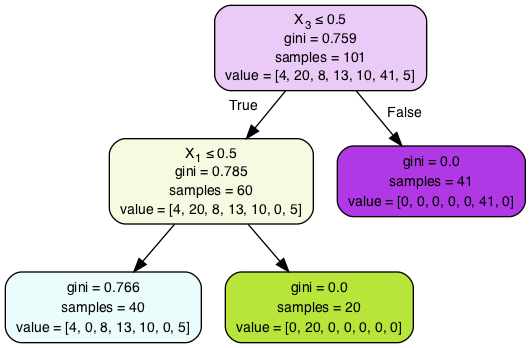

In [130]:
dtree=DecisionTreeClassifier(max_depth=2)
dtree.fit(df,y)

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



export_graphviz(dtree, out_file='tree.dot')
Image(graph.create_png())

In [131]:
dot_data.getvalue()

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<X<SUB>3</SUB> &le; 0.5<br/>gini = 0.759<br/>samples = 101<br/>value = [4, 20, 8, 13, 10, 41, 5]>, fillcolor="#b139e542"] ;\n1 [label=<X<SUB>1</SUB> &le; 0.5<br/>gini = 0.785<br/>samples = 60<br/>value = [4, 20, 8, 13, 10, 0, 5]>, fillcolor="#b7e53926"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<gini = 0.766<br/>samples = 40<br/>value = [4, 0, 8, 13, 10, 0, 5]>, fillcolor="#39e5e21a"] ;\n1 -> 2 ;\n3 [label=<gini = 0.0<br/>samples = 20<br/>value = [0, 20, 0, 0, 0, 0, 0]>, fillcolor="#b7e539ff"] ;\n1 -> 3 ;\n4 [label=<gini = 0.0<br/>samples = 41<br/>value = [0, 0, 0, 0, 0, 41, 0]>, fillcolor="#b139e5ff"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

In [132]:
df.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize'],
      dtype='object')

In [133]:
class_only[['class_name']]

,class_name
0,Mammal
1,Bird
2,Reptile
3,Fish
4,Amphibian
5,Bug
6,Invertebrate


In [134]:
list(class_only['class_name'].unique())

['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']

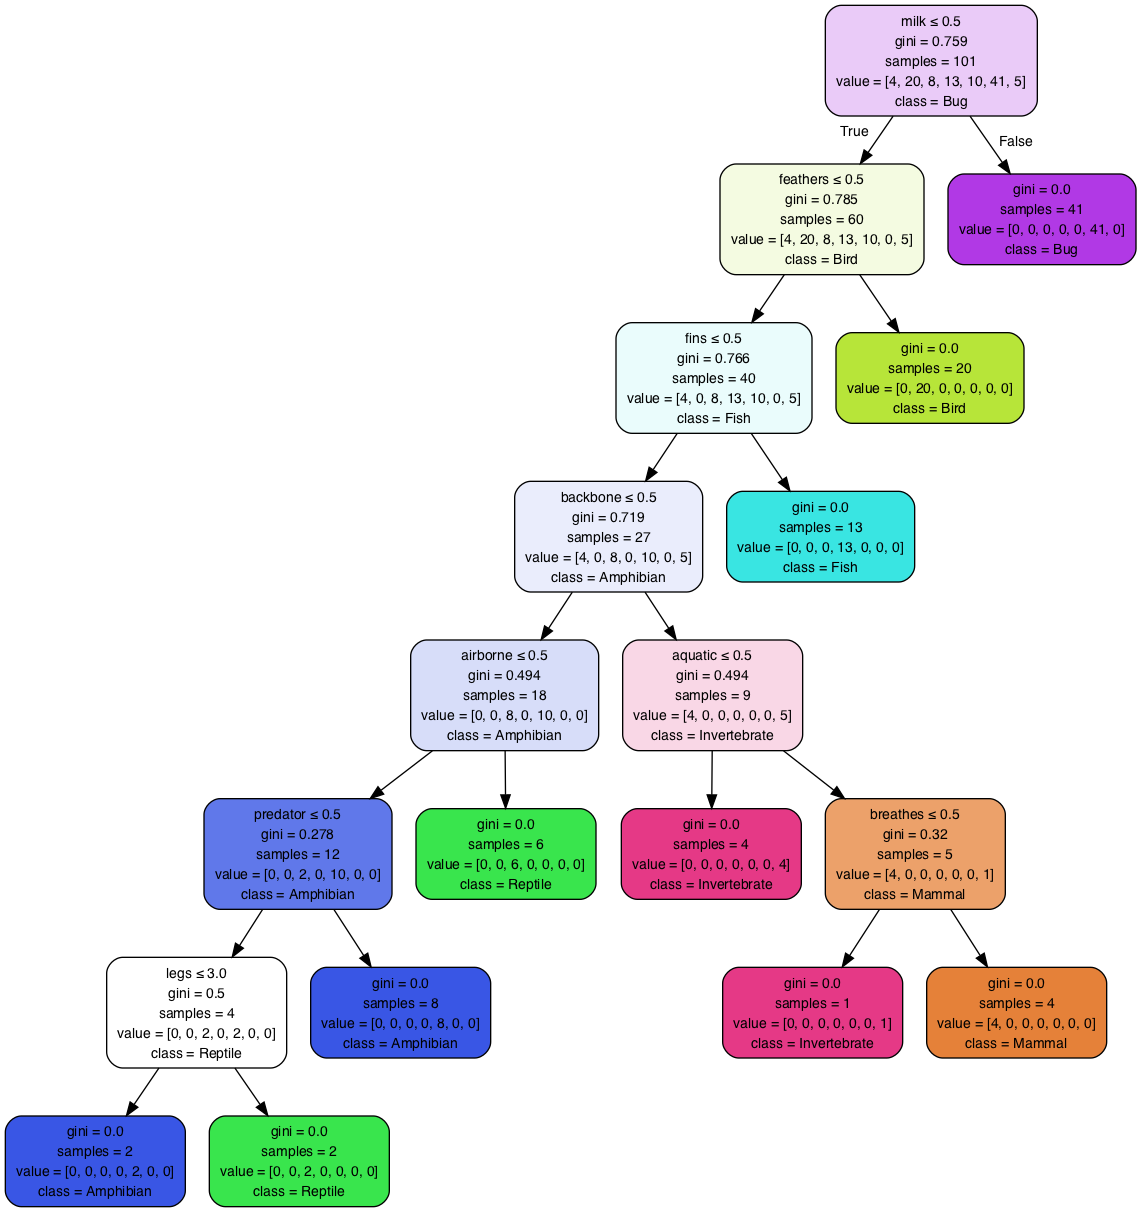

In [138]:
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = df.columns, class_names=list(class_only['class_name'].unique()))

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [139]:
export_graphviz(dtree, out_file='zoo.dot',  
                filled=True, rounded=True,
                special_characters=True, feature_names = df.columns, class_names=list(class_only['class_name'].unique()))